# <center>Book: Steven Bird, Ewan Klein, Edward Loper, 2009. **Natural Language Processing (NLP) with Python**, O'Reilly.</center> 


## <span style="color: blue;">Chapter #2 - Part 2</span>

## <span style="color: blue;">Today we will finish the exercises for chapter #2!</span>

In [1]:
# Lets first import all we will need for these first questions
import nltk
from nltk.corpus import gutenberg
from nltk.corpus import state_union
from nltk.corpus import wordnet as wn
from nltk.corpus import brown
import matplotlib.pyplot as plt
%matplotlib inline

### 12) The CMU Pronouncing Dictionary contains multiple pronunciations for certain words. How many distinct words does it contain? What fraction of words in this dictionary have more than one possible pronunciation?

In [2]:
# number of entries:
number_entries = nltk.corpus.cmudict.entries()
len(number_entries)

133737

In [3]:
# number of words:
distinct_words = sorted(set([w for w, p in number_entries]))
len(distinct_words)

123455

In [4]:
# The % of words with more than one possible pronunciation:
(len(number_entries) - len(distinct_words)) / len(number_entries)

0.07688223902136282

** Thus, the fraction is $\frac{768,822,390,213}{10,000,000,000,000}$ **

### 14) Define a function supergloss(s) that takes a synset s as its argument and returns a string consisting of the concatenation of the definition of s, and the definitions of all the hypernyms and hyponyms of s.

In [5]:
# This function prints a concatenation of words and its definition along with all word's hyper. and hypo.
def supergloss(synset):
    full_stop = synset.index('.')
    term = synset[:full_stop]
    syn = wn.synset(synset)
    print(term + ":", syn.definition())
    
    print("\nHYPERNYMS:")
    for s in syn.hypernyms():
        names = []
        for name in s.lemma_names():
            names.append(name)
        print(", ".join(names) + ":", s.definition())

    print("\nHYPONYMS:")
    for s in syn.hyponyms():
        names = []
        for name in s.lemma_names():
            names.append(name)
        print(", ".join(names) + ":", s.definition())

In [6]:
supergloss('drum.n.01')

drum: a musical percussion instrument; usually consists of a hollow cylinder with a membrane stretched across each end

HYPERNYMS:
percussion_instrument, percussive_instrument: a musical instrument in which the sound is produced by one object striking another

HYPONYMS:
bass_drum, gran_casa: a large drum with two heads; makes a sound of indefinite but very low pitch
bongo, bongo_drum: a small drum; played with the hands
snare_drum, snare, side_drum: a small drum with two heads and a snare stretched across the lower head
tabor, tabour: a small drum with one head of soft calfskin
tambour: a drum
tambourine: a shallow drum with a single drumhead and with metallic disks in the sides
tenor_drum, tom-tom: any of various drums with small heads
timbrel: small hand drum similar to a tambourine; formerly carried by itinerant jugglers


### 16) Write a program to generate a table of lexical diversity scores (i.e. token/type ratios), as we saw in 1.1. Include the full set of Brown Corpus genres (nltk.corpus.brown.categories()). Which genre has the lowest diversity (greatest number of tokens per type)? Is this what you would have expected?

In [7]:
# This function coerces nested lists or strings to a flat list
def coerce_to_list(text):
    if type(text[0]) == list:
        text = [i for s in text for i in s]
    elif type(text) == str:
        text = text.split(" ")
    return list(text)

In [8]:
# This function returns the diversity score of a text. If we have a lower frequency of words we have a high score.
def lexical_diversity(text):
    text = coerce_to_list(text)
    return len(set(text)) / len(text)

In [9]:
print("The scores are: ")
for c in brown.categories():
    ld = lexical_diversity(brown.words(categories = c))
    print("{}: {} {}".format(c, " " * (15 - len(c)), ld))

The scores are: 
adventure:        0.1279743878169075
belles_lettres:   0.10642071451679992
editorial:        0.16054152327770924
fiction:          0.1358194136199042
government:       0.11667641228232811
hobbies:          0.14493897625842492
humor:            0.23125144042406084
learned:          0.09268890745953554
lore:             0.13148804612915801
mystery:          0.12212912592488936
news:             0.14314696580941583
religion:         0.1617553745018909
reviews:          0.21192020440251572
romance:          0.12070492131044529
science_fiction:  0.22342778161713892


**Humor has the highest score, and learned the lowest.**

**Below we will explore the relationship number of tokens and diversity among the different genres!**

In [10]:
print("# of Tokens per category: \t Lexical diversity:")
for c in brown.categories():
    t = len(brown.words(categories = c))
    ld = lexical_diversity(brown.words(categories = c))
    print("{}: {} {} \t {:.5f}".format(c, " " * (20 - len(c)), t, ld))

# of Tokens per category: 	 Lexical diversity:
adventure:             69342 	 0.12797
belles_lettres:        173096 	 0.10642
editorial:             61604 	 0.16054
fiction:               68488 	 0.13582
government:            70117 	 0.11668
hobbies:               82345 	 0.14494
humor:                 21695 	 0.23125
learned:               181888 	 0.09269
lore:                  110299 	 0.13149
mystery:               57169 	 0.12213
news:                  100554 	 0.14315
religion:              39399 	 0.16176
reviews:               40704 	 0.21192
romance:               70022 	 0.12070
science_fiction:       14470 	 0.22343


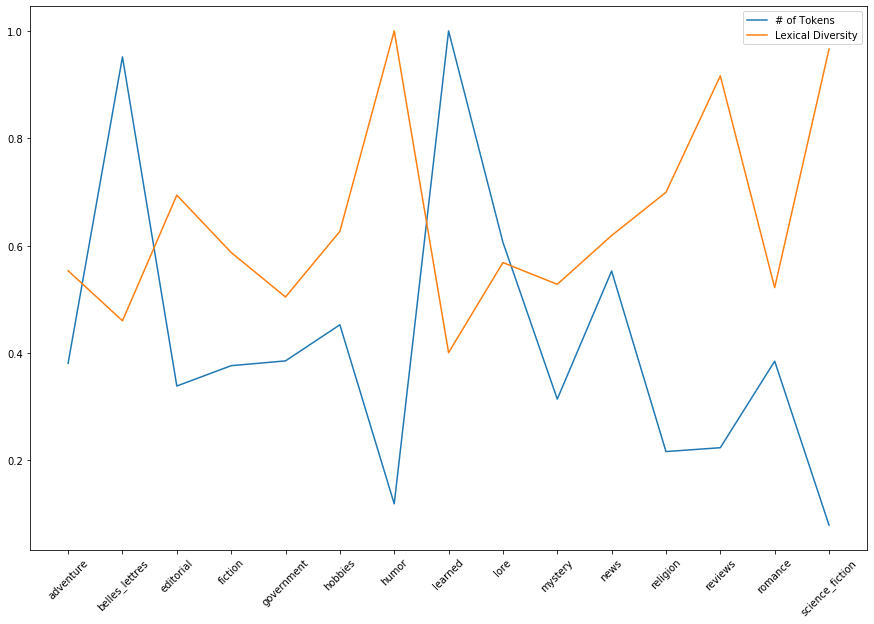

In [11]:
tokens = []
lex_div = []

for c in brown.categories():
    tokens.append(len(brown.words(categories = c)))
    lex_div.append(lexical_diversity(brown.words(categories = c)))

# normalizing the arrays
tokens = [t/max(tokens) for t in tokens]
lex_div = [l/max(lex_div) for l in lex_div]

plt.figure(figsize = (15, 10))
plt.plot(tokens, label = "# of Tokens")
plt.plot(lex_div, label = "Lexical Diversity")
plt.legend()
plt.xticks(range(15), brown.categories(), rotation = 45)

plt.show()

### 18) Write a program to print the 50 most frequent bigrams (pairs of adjacent words) of a text, omitting bigrams that contain stopwords.

In [12]:
# This function returns a list of the most frequent bigrams without stopwords.
# Arguments: text, n (# of most frequent bigrams), lang (language for stopwords)
def most_freq_bigrams_wo_stopwords(text, n = 50, lang = 'english'):
    text = coerce_to_list(text)
    stopwords = nltk.corpus.stopwords.words(lang)
    bigrams = nltk.bigrams(w.lower() for w in text if w.lower().isalpha() and w.lower() not in stopwords)
    fd = nltk.FreqDist(bigrams)
    return fd.most_common(n)

In [13]:
print(most_freq_bigrams_wo_stopwords(brown.words()), end = '')

[(('united', 'states'), 392), (('new', 'york'), 296), (('per', 'cent'), 146), (('years', 'ago'), 138), (('af', 'af'), 129), (('could', 'see'), 93), (('rhode', 'island'), 91), (('last', 'year'), 78), (('even', 'though'), 77), (('high', 'school'), 74), (('white', 'house'), 68), (('first', 'time'), 68), (('old', 'man'), 68), (('world', 'war'), 66), (('two', 'years'), 62), (('let', 'us'), 62), (('one', 'thing'), 60), (('fiscal', 'year'), 58), (('last', 'night'), 57), (('peace', 'corps'), 55), (('one', 'day'), 53), (('one', 'another'), 52), (('would', 'like'), 51), (('last', 'week'), 51), (('united', 'nations'), 49), (('new', 'england'), 49), (('young', 'man'), 47), (('los', 'angeles'), 47), (('two', 'men'), 46), (('one', 'two'), 43), (('great', 'deal'), 43), (('civil', 'war'), 42), (('president', 'kennedy'), 41), (('would', 'make'), 41), (('time', 'time'), 41), (('general', 'motors'), 41), (('small', 'business'), 41), (('long', 'time'), 40), (('new', 'orleans'), 40), (('many', 'years'), 40

In [14]:
print(most_freq_bigrams_wo_stopwords(brown.sents()), end = '')

[(('united', 'states'), 392), (('new', 'york'), 296), (('per', 'cent'), 146), (('years', 'ago'), 138), (('af', 'af'), 129), (('could', 'see'), 93), (('rhode', 'island'), 91), (('last', 'year'), 78), (('even', 'though'), 77), (('high', 'school'), 74), (('white', 'house'), 68), (('first', 'time'), 68), (('old', 'man'), 68), (('world', 'war'), 66), (('two', 'years'), 62), (('let', 'us'), 62), (('one', 'thing'), 60), (('fiscal', 'year'), 58), (('last', 'night'), 57), (('peace', 'corps'), 55), (('one', 'day'), 53), (('one', 'another'), 52), (('would', 'like'), 51), (('last', 'week'), 51), (('united', 'nations'), 49), (('new', 'england'), 49), (('young', 'man'), 47), (('los', 'angeles'), 47), (('two', 'men'), 46), (('one', 'two'), 43), (('great', 'deal'), 43), (('civil', 'war'), 42), (('president', 'kennedy'), 41), (('would', 'make'), 41), (('time', 'time'), 41), (('general', 'motors'), 41), (('small', 'business'), 41), (('long', 'time'), 40), (('new', 'orleans'), 40), (('many', 'years'), 40

### 20) Write a function word_freq() that takes a word and the name of a section of the Brown Corpus as arguments, and computes the frequency of the word in that section of the corpus.

In [15]:
# This function returns the frequency of a given section in the Brown corpus.
def word_freq(word, genre):
    i = 0
    for w in brown.words(categories = genre):
        if w.lower() == word.lower():
            i += 1
    return i

In [16]:
word_freq("President", "news")

142

### 22) Define a function hedge(text) which processes a text and produces a new version with the word 'like' between every third word.

In [17]:
# This funciton returns a modified version of a text, including a word after an interval words along all text
def hedge(text, word, interval = 3, output = "string"):
    text = coerce_to_list(text)
    if output == "string":
        newstring = ""
        i = 1
        for t in text:
            if t.isalpha() and i % interval == 0:
                newstring += t + " " + word + " "
                i += 1
            elif t.isalpha():    
                newstring += t + " "
                i += 1
            else:
                newstring += t + " "
        return newstring
    elif output == "list":
        newlist = []
        i = 1
        for t in text:
            if t.isalpha() and i % interval == 0:
                newlist.append(t)
                newlist.append(word)
                i += 1
            elif t.isalpha():    
                newlist.append(t)
                i += 1
            else:
                newlist.append(t)
        return newlist
    else:
        print("Output can only be a string!")    

In [18]:
hedge("this is a test of a test for a test", "like")

'this is a like test of a like test for a like test '

In [19]:
print(hedge(brown.sents(categories = 'humor')[0:5], "like", output = "list"), end = '')

['It', 'was', 'among', 'like', 'these', 'that', 'Hinkle', 'like', 'identified', 'a', 'photograph', 'like', 'of', 'Barco', '!', '!', 'For', 'like', 'it', 'seems', 'that', 'like', 'Barco', ',', 'fancying', 'himself', 'like', 'a', "ladies'", 'man', '(', 'and', 'like', 'why', 'not', ',', 'after', 'like', 'seven', 'marriages', '?', '?', ')', ',', 'had', 'like', 'listed', 'himself', 'for', 'like', 'Mormon', 'Beard', 'roles', 'like', 'at', 'the', 'instigation', 'like', 'of', 'his', 'fourth', 'like', 'murder', 'victim', 'who', 'like', 'had', 'said', ':', '``', 'With', 'like', 'your', 'beard', ',', 'dear', 'like', ',', 'you', 'ought', 'to', 'like', 'be', 'in', 'movies', 'like', "''", '!', '!', 'Mills', 'secured', "Barco's", 'photograph', 'like', 'from', 'the', 'gentleman', 'like', 'in', 'charge', ',', 'rushed', 'like', 'to', 'the', 'Hollywood', 'like', 'police', 'station', 'to', 'like', 'report', 'the', 'theft', 'like', ',', 'and', 'less', 'than', 'like', 'five', 'minutes', 'later', 'like', ','

### 26) What is the branching factor of the noun hypernym hierarchy? I.e. for every noun synset that has hyponyms — or children in the hypernym hierarchy — how many do they have on average? You can get all noun synsets using wn.all_synsets('n').

In [20]:
from nltk.corpus import wordnet as wn

l = list(wn.all_synsets('n'))

hypo_branches = []
for i in l:
    hypo_branches.append(len(i.hyponyms()))

sum(hypo_branches)/len(hypo_branches)

0.9237045606770992

In [21]:
hyper_branches = []
for i in l:
    hyper_branches.append(len(i.hypernyms()))
sum(hyper_branches)/len(hyper_branches)

0.9237045606770992

In [22]:
## Some of the functions used here were inspired by https://github.com/Sturzgefahr/